<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Nov24-25/Red_Neuronal_for_clasificaci%C3%B3n_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from scipy import ndimage


#Carga de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/UGTO/DCI-data/train.csv')

Mounted at /content/drive


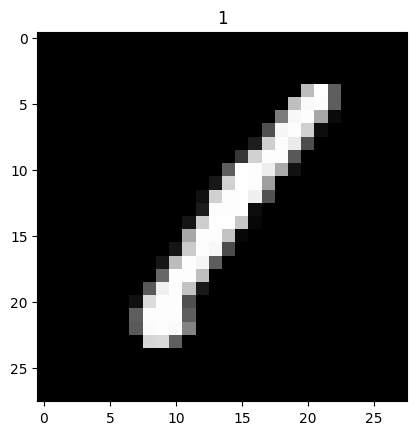

In [21]:
etiquetas = data.iloc[:, 0]
imagenes = data.iloc[:, 1:].values
img = imagenes[0, :].reshape(28, 28)

plt.imshow(img , cmap='gray')
plt.title(etiquetas.iloc[0])
plt.show()

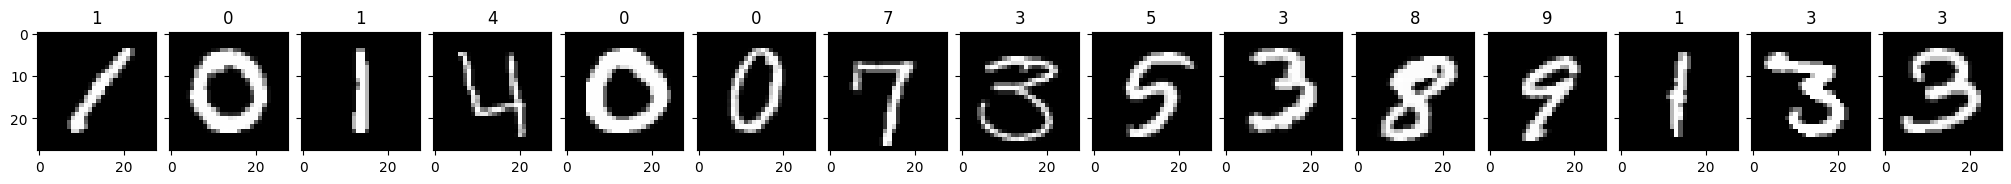

In [15]:
nrows_ = 1
ncols_ = 15
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(20, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.imshow(imagenes[i,:].reshape(28,28) , cmap='gray')
  ax.set_title(etiquetas.iloc[i])
  #ax.grid()

##Preparar datos

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imagenes,etiquetas, test_size=0.20, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Realizando un modelo (red neuronal)

## Primera forma

In [74]:
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(10, activation='relu', name = 'layer1'),
        Dense(10, activation='softmax', name = 'layer3')
     ]
)

model.compile(optimizer='sgd', loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 5, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
1050/1050 [==============================] - 3s 3ms/step - loss: 3.5010 - accuracy: 0.1122 - val_loss: 49.9713 - val_accuracy: 0.0968
Epoch 2/5
1050/1050 [==============================] - 3s 3ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 49.9722 - val_accuracy: 0.0952
Epoch 3/5
1050/1050 [==============================] - 6s 6ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 49.9694 - val_accuracy: 0.0943
Epoch 4/5
1050/1050 [==============================] - 4s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 49.9695 - val_accuracy: 0.0942
Epoch 5/5
1050/1050 [==============================] - 4s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 49.9668 - val_accuracy: 0.0943


como se puede observar en el siguiente cuadro de codigo tuve un mejor resultado definiendo de esta manera el modelo

In [89]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.8944 - accuracy: 0.7342 - val_loss: 0.5073 - val_accuracy: 0.8505
Epoch 2/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4000 - accuracy: 0.8809 - val_loss: 0.3887 - val_accuracy: 0.8911
Epoch 3/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3240 - accuracy: 0.9037 - val_loss: 0.3503 - val_accuracy: 0.8995
Epoch 4/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2901 - accuracy: 0.9137 - val_loss: 0.3265 - val_accuracy: 0.9076
Epoch 5/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2689 - accuracy: 0.9196 - val_loss: 0.3132 - val_accuracy: 0.9125


In [90]:
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)

263/263 [==============================] - 1s 2ms/step - loss: 50.8809 - accuracy: 0.7199
50.88090515136719 0.7198809385299683


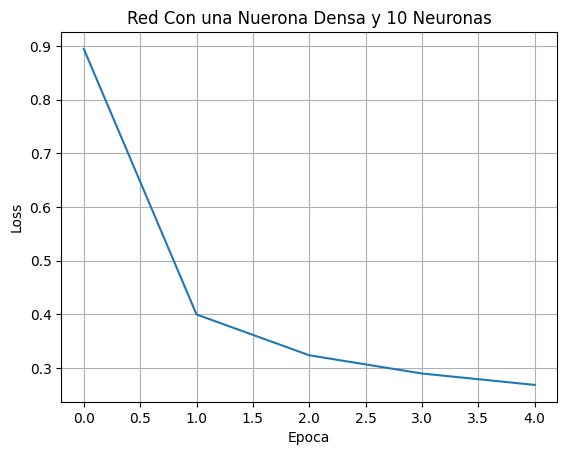

In [91]:
plt.plot(history.history['loss'])
plt.title('Red Con una Nuerona Densa y 10 Neuronas')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.grid()
plt.show()

## recomendada

In [99]:
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(10, activation='relu', name = 'layer1'),
        Dense(10, activation='softmax', name = 'layer2')
     ]
)

model.compile(optimizer='sgd', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.8480 - accuracy: 0.7476 - val_loss: 0.4834 - val_accuracy: 0.8593
Epoch 2/5
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3932 - accuracy: 0.8855 - val_loss: 0.3794 - val_accuracy: 0.8923
Epoch 3/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3224 - accuracy: 0.9069 - val_loss: 0.3462 - val_accuracy: 0.9057
Epoch 4/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2887 - accuracy: 0.9154 - val_loss: 0.3274 - val_accuracy: 0.9087
Epoch 5/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2679 - accuracy: 0.9210 - val_loss: 0.3179 - val_accuracy: 0.9140


In [100]:
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)

263/263 [==============================] - 1s 2ms/step - loss: 31.3705 - accuracy: 0.8261
31.37053871154785 0.8260714411735535


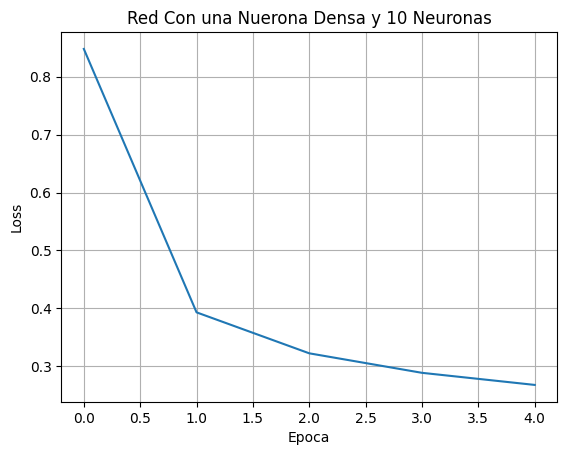

In [101]:
plt.plot(history.history['loss'])
plt.title('Red Con una Nuerona Densa y 10 Neuronas')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.grid()
plt.show()

Observamos que tenemos un mejor rendimiento en accuracy en la prueba recomendado, por lo que se utilizara para hacer mas pruebas.

Epoch 1/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.8462 - accuracy: 0.7548 - val_loss: 0.4880 - val_accuracy: 0.8671
Epoch 2/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3865 - accuracy: 0.8882 - val_loss: 0.3924 - val_accuracy: 0.8910
Epoch 3/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3197 - accuracy: 0.9064 - val_loss: 0.3541 - val_accuracy: 0.9037
Epoch 4/5
1050/1050 [==============================] - 8s 7ms/step - loss: 0.2859 - accuracy: 0.9171 - val_loss: 0.3337 - val_accuracy: 0.9108
Epoch 5/5
263/263 [==============================] - 1s 2ms/step - loss: 47.5253 - accuracy: 0.7456
47.525333404541016 0.7455952167510986


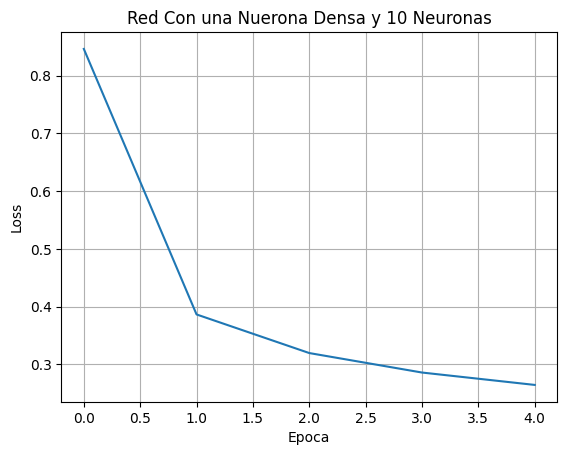

In [98]:
# modelo a probar
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
# Costo y accuracy
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)
# Mostrar costo
plt.plot(history.history['loss'])
plt.title('Red Con una Nuerona Densa y 10 Neuronas')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.grid()
plt.show()

## Aumentado las capas

Epoch 1/5
1050/1050 [==============================] - 6s 4ms/step - loss: 1.8425 - accuracy: 0.3527 - val_loss: 1.4769 - val_accuracy: 0.4776
Epoch 2/5
1050/1050 [==============================] - 4s 4ms/step - loss: 1.2661 - accuracy: 0.5343 - val_loss: 1.1026 - val_accuracy: 0.6015
Epoch 3/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.9503 - accuracy: 0.6360 - val_loss: 0.9261 - val_accuracy: 0.6496
Epoch 4/5
1050/1050 [==============================] - 7s 6ms/step - loss: 0.8156 - accuracy: 0.7176 - val_loss: 0.7955 - val_accuracy: 0.7370
Epoch 5/5
263/263 [==============================] - 1s 3ms/step - loss: 40.2847 - accuracy: 0.6262
40.284706115722656 0.6261904835700989


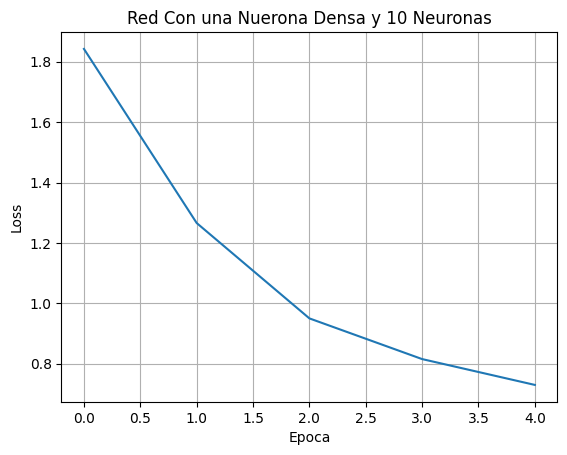

In [102]:
# modelo a probar
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
# Costo y accuracy
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)
# Mostrar costo
plt.plot(history.history['loss'])
plt.title('Red Con una Nuerona Densa y 10 Neuronas')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.grid()
plt.show()

## aumentando las neuronas

Epoch 1/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.5275 - accuracy: 0.8548 - val_loss: 0.3333 - val_accuracy: 0.9092
Epoch 2/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2476 - accuracy: 0.9279 - val_loss: 0.2736 - val_accuracy: 0.9261
Epoch 3/5
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1968 - accuracy: 0.9434 - val_loss: 0.2456 - val_accuracy: 0.9357
Epoch 4/5
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1677 - accuracy: 0.9513 - val_loss: 0.2286 - val_accuracy: 0.9406
Epoch 5/5
263/263 [==============================] - 1s 4ms/step - loss: 22.3980 - accuracy: 0.8592
22.398006439208984 0.85916668176651


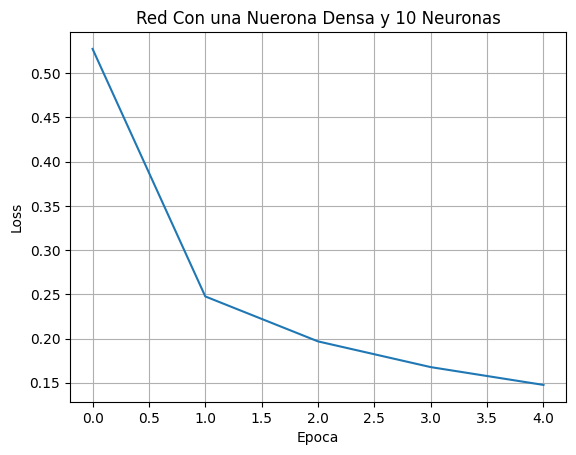

In [103]:
# modelo a probar
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
# Costo y accuracy
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)
# Mostrar costo
plt.plot(history.history['loss'])
plt.title('Red Con una Nuerona Densa y 10 Neuronas')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.grid()
plt.show()

Epoch 1/5
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5013 - accuracy: 0.8631 - val_loss: 0.3067 - val_accuracy: 0.9133
Epoch 2/5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2418 - accuracy: 0.9303 - val_loss: 0.2472 - val_accuracy: 0.9302
Epoch 3/5
1050/1050 [==============================] - 8s 8ms/step - loss: 0.1899 - accuracy: 0.9471 - val_loss: 0.2162 - val_accuracy: 0.9381
Epoch 4/5
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1603 - accuracy: 0.9545 - val_loss: 0.1978 - val_accuracy: 0.9424
Epoch 5/5
263/263 [==============================] - 2s 6ms/step - loss: 23.3288 - accuracy: 0.8513
23.328807830810547 0.8513095378875732


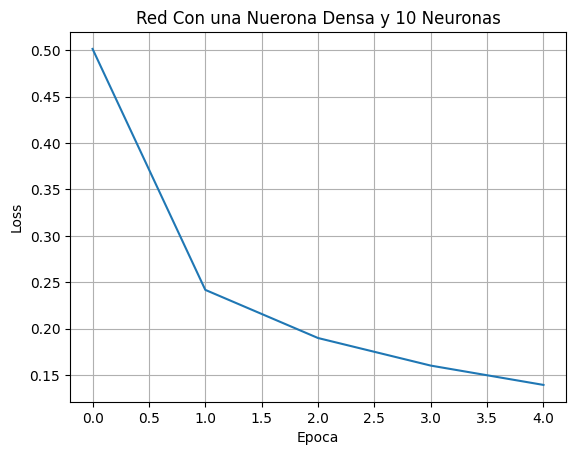

In [104]:
# modelo a probar
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
# Costo y accuracy
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)
# Mostrar costo
plt.plot(history.history['loss'])
plt.title('Red Con una Nuerona Densa y 10 Neuronas')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.grid()
plt.show()

## podemos observar que el uso de mas neuronas mejoramos mas el accuracy que no obtenemos aumentando el numero de capas, contrario a esto tenemos una reduccion a este valor en los casos de mas capas.